<a href="https://colab.research.google.com/github/longovinicius/Laboratorio_CMA/blob/main/CMA_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coleta e processamento dos dados**

In [3]:
import pandas as pd

df_raw = pd.read_csv('/content/CMA_dados_encoded.csv', header=None)
df_raw.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8: expected 1 fields, saw 2\nSkipping line 9: expected 1 fields, saw 4\nSkipping line 10: expected 1 fields, saw 4\nSkipping line 11: expected 1 fields, saw 4\nSkipping line 12: expected 1 fields, saw 4\nSkipping line 13: expected 1 fields, saw 4\nSkipping line 14: expected 1 fields, saw 4\nSkipping line 15: expected 1 fields, saw 4\nSkipping line 16: expected 1 fields, saw 4\nSkipping line 17: expected 1 fields, saw 4\nSkipping line 18: expected 1 fields, saw 4\nSkipping line 19: expected 1 fields, saw 4\nSkipping line 20: expected 1 fields, saw 4\nSkipping line 21: expected 1 fields, saw 4\nSkipping line 22: expected 1 fields, saw 4\nSkipping line 23: expected 1 fields, saw 4\nSkipping line 24: expected 1 fields, saw 4\nSkipping line 2

,0
0,Tabela Resultados 2;;;
1,;Grupo;Material;Taxa
2,;;;(mm/min)
3,6;6;Polímero;2
4,;;;


In [11]:
df_raw.drop([0,1,2,3,4,5], axis=0)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
6,0,0,0.0028
7,0.05,0.0001,0.0029
8,0.1,0.0007,0.0022
9,0.15,0.0023,0.0019
10,0.2,0.0047,0.0046
...,...,...,...
4792,239.3,7.9768,1.3574
4793,239.35,7.9784,1.3509
4794,239.4,7.98,1.3398
4795,239.45,7.9817,1.267


In [ ]:
df = df_raw[0] + df_raw[1] + df_raw[2]

data = [line.replace("\"", "").strip().split(";") for line in df[2:]]
data[0:5]

[['0,0000', '26080', '12259'],
 ['0,0500', '26147', '12413'],
 ['0,1000', '26368', '14767'],
 ['0,1500', '26646', '17677'],
 ['0,2000', '26941', '19756']]

In [ ]:
tempos, deslocamentos, forcas = [], [], []

for line in data:
  tempos.append(float(line[0].replace(",", ".")))
  deslocamentos.append(float(line[1])/10000)
  forcas.append(int(line[2])/10)

print(f"tempos(s): {tempos[0:5]}")
print(f"deslocamentos(mm): {deslocamentos[0:5]}")
print(f"forcas(N): {forcas[0:5]}")


tempos(s): [0.0, 0.05, 0.1, 0.15, 0.2]
deslocamentos(mm): [2.608, 2.6147, 2.6368, 2.6646, 2.6941]
forcas(N): [1225.9, 1241.3, 1476.7, 1767.7, 1975.6]


# **Gráficos**

## Força [kN] x Deslocamento [mm]

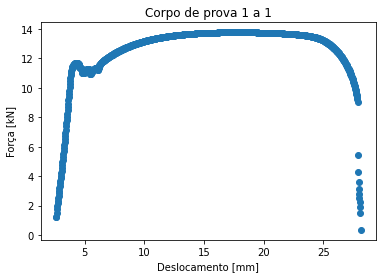

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


plt.scatter(deslocamentos, [forca/1000 for forca in forcas])

plt.title("Corpo de prova 1 a 1")
plt.xlabel("Deslocamento [mm]")
plt.ylabel("Força [kN]")

plt.show()

## Tensão (σ) x Deformação (ε)

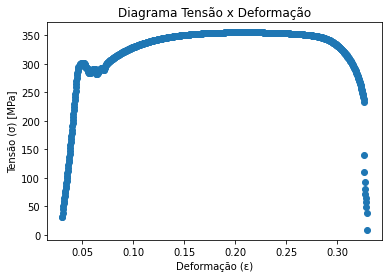

In [ ]:
largura_inicial = 12.80 # valores em mm
espessura_inicial = 3.03
comprimento_inicial = 85.50
A0 = (largura_inicial/1000)*(espessura_inicial/1000) # m^2

tensoes = [(forca/A0)/1000000 for forca in forcas] # Tensao em MPa (Pa : N/m^2)
deformacoes = [deslocamento/comprimento_inicial for deslocamento in deslocamentos] # mm/mm


plt.scatter(deformacoes, tensoes)

plt.title("Diagrama Tensão x Deformação")
plt.xlabel("Deformação (ε)")
plt.ylabel("Tensão (σ) [MPa]")

plt.show()

# **Operacoes Item 4:**

## a) Modulo de Elasticidade: 16542.05 MPa

#### Entendendo Gráfico

Plotando Grafico proximo do limite de escoamento

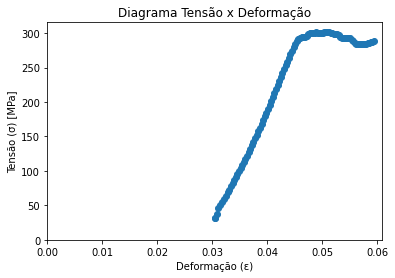

In [ ]:
plt.scatter(deformacoes[:100], tensoes[:100])

plt.title("Diagrama Tensão x Deformação")
plt.xlabel("Deformação (ε)")
plt.ylabel("Tensão (σ) [MPa]")

x1,x2,y1,y2 = plt.axis()
plt.axis((0,x2,0,y2))
plt.show()

Encontrando primeira derivada = 0

In [ ]:
for i, tensao in enumerate(tensoes):
  if (tensoes[i+1]-tensoes[i])/(deformacoes[i+1]-deformacoes[i]) < 0:
    index_first_spike = i
    break

print(f"Tensao[index_first_spike] = {tensoes[index_first_spike]}")
print(f"Deformacao[index_first_spike] = {deformacoes[index_first_spike]}")

Tensao[index_first_spike] = 294.72720709570956
Deformacao[index_first_spike] = 0.046302923976608186


#### Metodo Hooke σ/ε = 3990.39 MPa

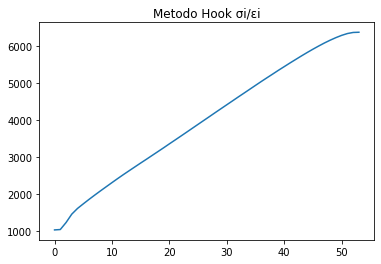

In [ ]:
teste_hook = []
for i, tensao in enumerate(tensoes[0:index_first_spike]):
  teste_hook.append(tensoes[i]/deformacoes[i])
plt.title("Metodo Hook σi/εi")
plt.plot(teste_hook)
plt.show()

In [ ]:
sum(teste_hook)/len(teste_hook)

3990.393785698898

#### Metodo Hooke alterado = 16542.05 MPa

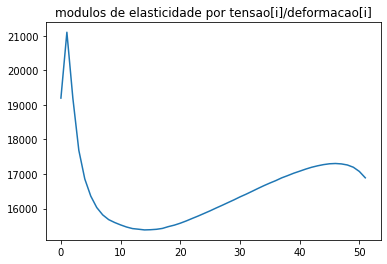

In [ ]:
hooke = []
for i in range(index_first_spike):
  if i>1:
    hooke.append((tensoes[i]-tensoes[0])/(deformacoes[i]-deformacoes[0]))
resultado = sum(hooke)/len(hooke)

plt.title("modulos de elasticidade por tensao[i]/deformacao[i]")
plt.plot(hooke)
plt.show()

In [ ]:
sum(hooke)/len(hooke)

16542.05435809347

#### Metodo Young = 16533.85 MPa

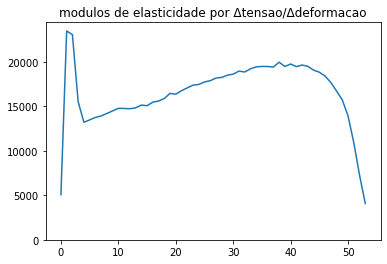

In [ ]:
coeficientes_angulares = []

# calculo do modulo de elasticidade em diversos pontos 
for i, tensao in enumerate(tensoes[0:index_first_spike]):
  coeficientes_angulares.append((tensoes[i+1]-tensoes[i])/(deformacoes[i+1]-deformacoes[i]))

# random elements
plt.title("modulos de elasticidade por Δtensao/Δdeformacao")
plt.plot(coeficientes_angulares)

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,y2))
plt.show()

In [ ]:
print(f"Modulo de elasticidade normal em MPa: {sum(coeficientes_angulares)/len(coeficientes_angulares)}")

Modulo de elasticidade normal em MPa: 16533.8553372965


#### Método Young alterado = 17250.25 MPa




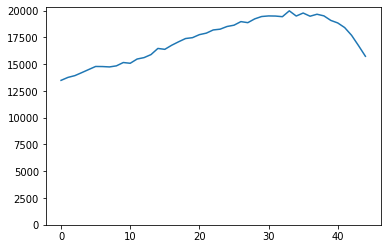

In [ ]:
# extraindo apenas coeficientes que representem fase elastica do material
coeficientes_angulares_ajustados = [coeficiente for i, coeficiente in enumerate(coeficientes_angulares) \
                          if (abs(coeficiente-coeficientes_angulares[i-1])/coeficiente) < 0.10 \
                          and coeficiente>10000 and coeficiente<20000]

plt.plot(coeficientes_angulares_ajustados)
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,y2))
plt.show()

In [ ]:
modulo_elasticidade_medio = sum(coeficientes_angulares_ajustados)/len(coeficientes_angulares_ajustados)
print(f"Modulo de elasticidade ajustado em MPa: {modulo_elasticidade_medio}")


Modulo de elasticidade ajustado em MPa: 17250.252702456815


## b) Tensão de Escoamento: 279.56 MPa

#### Método reta paralela: 300.30MPa

A[x0*1.002] + B = x0

modulo_elasticidade_medio*(deformacoes[0]*1.002) + B = deformacoes[0]

B = deformacoes[0] - (deformacoes[0]*1.002)*modulo_elasticidade_medio


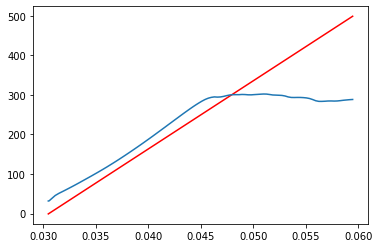

In [ ]:
import numpy as np
x0 = deformacoes[0]
A = modulo_elasticidade_medio
B = x0 - (x0*1.002)*A

poly = [A, B]

y = np.polyval(poly, deformacoes[:100])


plt.plot(deformacoes[:100], y, '-r')
plt.plot(deformacoes[:100], tensoes[:100])

In [ ]:
for i, tensao in enumerate(tensoes):
  if y[i] > tensao:
    tensao_de_escoamento = tensao
    break
print(f"Tensão de Escoamento: {round(tensao_de_escoamento, 2)} MPa")

Tensão de Escoamento: 300.3 MPa


#### Método mais Preciso: 279.56 MPa

Encontrando ponto onde há grande variação do coeficiente angular na fase elástica

In [ ]:
tensoes_elastica = tensoes[:coeficientes_angulares.index(coeficientes_angulares_ajustados[-1])+1]

tensoes_elastica[-1]

279.5611592409241

## c)Tensão Máxima: 355.31 MPa

In [ ]:
print(f"Tensão Máxima = {round(max(tensoes), 2)} MPa")

Tensão Máxima = 355.31 MPa


## d)Tensão de Ruptura: 232.57 MPa

Ao final do gráfico, houve descontinuidade

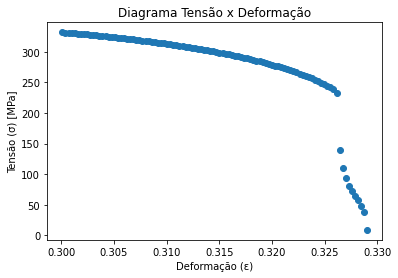

In [ ]:
plt.scatter(deformacoes[-100:], tensoes[-100:])

plt.title("Diagrama Tensão x Deformação")
plt.xlabel("Deformação (ε)")
plt.ylabel("Tensão (σ) [MPa]")

plt.show()

In [ ]:
for tensao in tensoes[-100:]:
  i = tensoes.index(tensao)
  if (tensao-tensoes[i+1])/tensao > 0.2:
    tensao_de_ruptura = tensao
    break
print(f"Tensão de Ruptura = {round(tensao_de_ruptura, 2)} MPa")

Tensão de Ruptura = 232.57 MPa


## e)Módulo de Resiliência: 3.05 MPa

sum(tensoes*Δdeformacoes)

In [ ]:
soma = []
for i in range(0, tensoes.index(tensao_de_escoamento)):
  dD = deformacoes[i+1]-deformacoes[i]
  soma.append(tensoes[i]*dD)
sum(soma)

3.0532397335128265

## f)Módulo de Tenacidade 96.57 MPa

In [ ]:
soma = []
for i in range(0, tensoes.index(tensao_de_ruptura)):
  dD = deformacoes[i+1]-deformacoes[i]
  soma.append(tensoes[i]*dD)
sum(soma)



96.57086552240752